<a href="https://colab.research.google.com/github/allurimeenakshi/Stock-Price-Prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/ML Datasets/AAPL.csv')
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [ ]:
df_train.shape

(10468, 7)

DATE: This column contains the dates of each stock market entry (e.g., trading days). It is an object type, meaning the data is in string format. You may need to convert this to a datetime format for time series analysis or modeling.

OPEN: This column represents the opening price of the stock on each trading day. It is of type float64, indicating it holds decimal values.

HIGH: The highest price the stock reached during that day's trading session. This is also a float64.

LOW: The lowest price the stock reached during the trading day. Again, stored as a float64.

CLOSE: The closing price of the stock at the end of the trading session. This is a key value that is often used in stock market analysis. It is also a float64.

Adj Close: The adjusted closing price, which accounts for corporate actions like dividends, stock splits, etc. This is important when analyzing the true price change over time. It is stored as a float64.

VOLUME: The total number of shares traded during the day. This is represented as an integer (int64).


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


df_train.head() => it will display the actual first five rows from your dataset.

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


The df_train.tail() function will show the last 5 rows of your dataset

In [ ]:
df_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


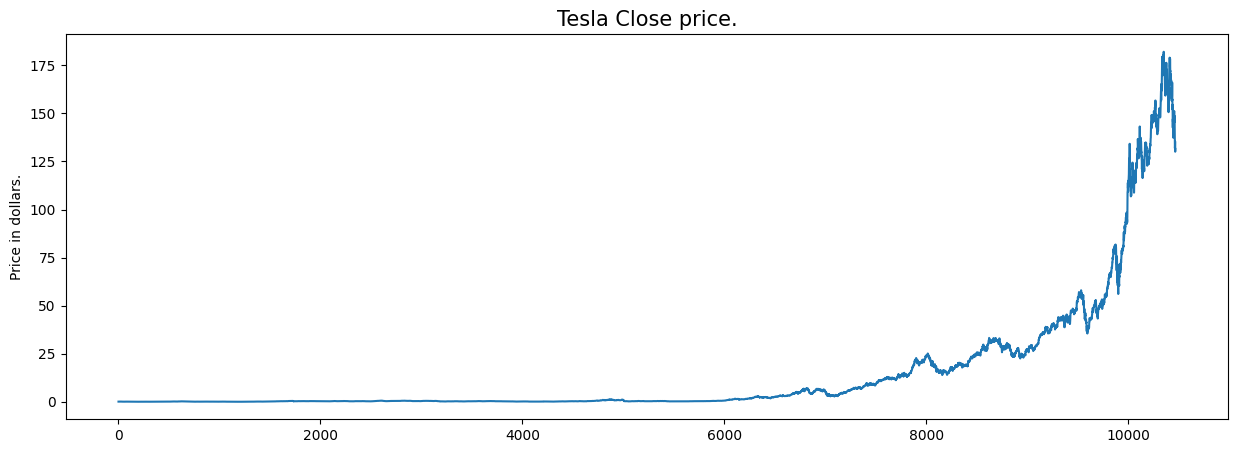

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_train['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
training_set = df_train.iloc[:,1:2]
print(training_set)

             Open
0        0.128348
1        0.122210
2        0.113281
3        0.115513
4        0.118862
...           ...
10463  132.869995
10464  133.130005
10465  134.289993
10466  132.080002
10467  130.070007

[10468 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [7.35239774e-01],
       [7.23135563e-01],
       [7.12126738e-01]])

In [ ]:
data_close = df_train.reset_index()['Close']

In [ ]:
data_close

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862
...,...
10463,131.880005
10464,132.759995
10465,135.429993
10466,130.059998


In [ ]:
data_close.shape

(10468,)

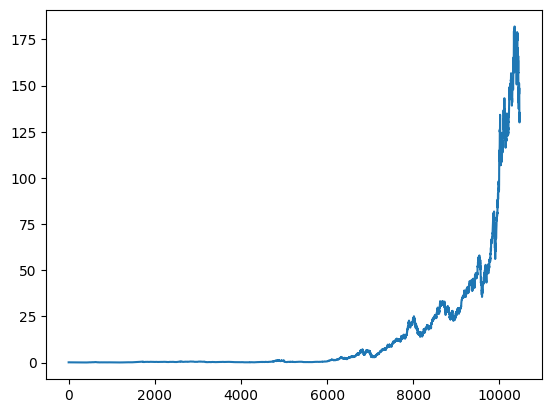

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_close)

In [ ]:
## LSTM are sensitive to scale of data so we have to apply MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [ ]:
data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [ ]:
#Splitting into Train nd Test
training_size = int(len(data)*0.65)
test_size = len(data)-training_size
training_data , test_data = data[0:training_size,:],data[training_size:len(data),:1]

In [ ]:
training_size , test_size

(6804, 3664)

In [ ]:
training_data

array([[0.00043548],
       [0.00039868],
       [0.00034961],
       ...,
       [0.03359533],
       [0.03404087],
       [0.03510272]])

In [ ]:
test_data

array([[0.03590156],
       [0.03549527],
       [0.03483578],
       ...,
       [0.74401091],
       [0.7144991 ],
       [0.72274263]])

In [ ]:
import numpy

def create_matrix(dataset,time_step=1):
  dataX , dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]  #i=0 , 0,1,2,3 4th will be appended in next line of code if time_step = 3
    dataX.append(a)     #Contains all values from 1 to Time_step
    dataY.append(dataset[i+time_step , 0])   #Contains just the end value to Time_step
  return numpy.array(dataX) , numpy.array(dataY)

In [ ]:
#shaping into X=t , t+1 , t+2 , t+3 and t+4

time_step = 100
X_train, y_train = create_matrix(training_data, time_step)
X_test , y_test = create_matrix(test_data , time_step)

In [ ]:
X_train

array([[0.00043548, 0.00039868, 0.00034961, ..., 0.00042322, 0.00042015,
        0.00040175],
       [0.00039868, 0.00034961, 0.00036495, ..., 0.00042015, 0.00040175,
        0.00041095],
       [0.00034961, 0.00036495, 0.00038335, ..., 0.00040175, 0.00041095,
        0.00041708],
       ...,
       [0.02469036, 0.02578556, 0.02569724, ..., 0.03190933, 0.03287108,
        0.03279453],
       [0.02578556, 0.02569724, 0.02531058, ..., 0.03287108, 0.03279453,
        0.03339906],
       [0.02569724, 0.02531058, 0.02570706, ..., 0.03279453, 0.03339906,
        0.03359533]])

In [ ]:
X_train.shape #Contains all 6703 rows with 100 columns of values

(6703, 100)

In [ ]:
y_train.shape  #Contains all 6703 rows with 1 column that is output of those values

(6703,)

In [ ]:
#Re-shaping input to give to LSTM into 3-D so we will add another dimension to it

X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [ ]:
#LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#Stacked LSTM
model = Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train , y_train , validation_data = (X_test,y_test) , epochs=100 , batch_size=64 , verbose=1)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 28s 219ms/step - loss: 3.5098e-05 - val_loss: 0.0039
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 44s 251ms/step - loss: 2.8155e-07 - val_loss: 0.0035
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 223ms/step - loss: 3.7626e-07 - val_loss: 0.0032
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - loss: 4.5631e-07 - val_loss: 0.0029
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - loss: 2.5098e-07 - val_loss: 0.0035
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - loss: 3.0760e-07 - val_loss: 0.0031
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - loss: 3.5473e-07 - val_loss: 0.0035
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - loss: 3.4303e-07 - val_loss: 0.0027
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - loss: 2.3588e-07 - val_loss: 0.0024
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - loss: 2.4884e-07 - val_loss: 0.0023
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 208ms/step - 

In [ ]:
#Doing prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


In [ ]:
# Doing prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reshape predictions to match the expected shape for inverse transformation
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print("Transformed Train Predictions:\n", train_predict)
print("Transformed Test Predictions:\n", test_predict)


210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
Transformed Train Predictions:
 [[0.08894917]
 [0.08805078]
 [0.08759926]
 ...
 [5.929376  ]
 [6.005959  ]
 [6.086161  ]]
Transformed Test Predictions:
 [[  5.7823415]
 [  5.8674064]
 [  5.950421 ]
 ...
 [122.184006 ]
 [120.29019  ]
 [118.75745  ]]


In [ ]:
train_predict.shape

(6703, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

# Calculate MAE
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

# Calculate R² Score
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Train RMSE: 1.0573967339774402
Test RMSE: 52.94010807305487
Train MAE: 0.5588400049361678
Test MAE: 38.86706319469285
Train R² Score: -45316.530253681594
Test R² Score: -49923.77556171894
